# Prediction of price problem

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv("avocado.csv")
df.columns#printing all the columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [2]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
#Checking unique values in target column
df['AveragePrice'].nunique()

259

Since we have 259 unique values in target column hence it is a regression problem.

In [5]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values

In [6]:
#Checking space values in target column
df.loc[df['AveragePrice']==" "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No vaues with space 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#Removing unnamed column
df = df.iloc[:,1:]

In [9]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [11]:
df.year.unique()

array([2015, 2016, 2017, 2018])

Here we see we have only 2,4 categories in type and year column respectively.

conventional    9126
organic         9123
Name: type, dtype: int64


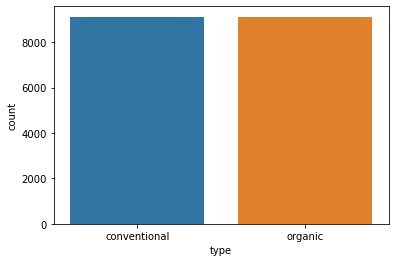

In [12]:
#Visualization of data
ax = sns.countplot(x="type",data=df)
print(df["type"].value_counts())

9126 of type conventional and 9123 type organic sold

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


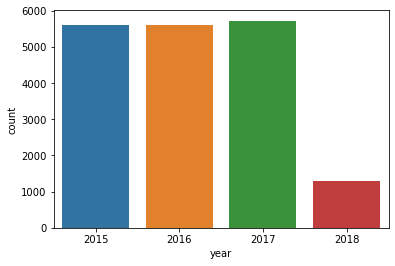

In [13]:
#Visualization of data
ax = sns.countplot(x="year",data=df)
print(df["year"].value_counts())

5722 in year 2017,5616 in year 2016, 5615 in year 2015 and 1296 in year 2018 avocado sold

conventional    9126
organic         9123
Name: type, dtype: int64


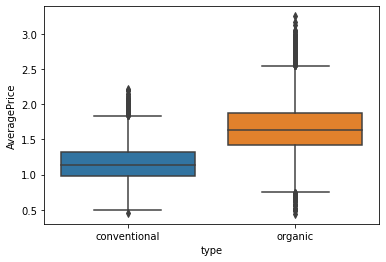

In [14]:
ax = sns.boxplot(x="type",y="AveragePrice",data=df)
print(df["type"].value_counts())

From the above boxplot we find that the price of type organic is more than type conventional.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


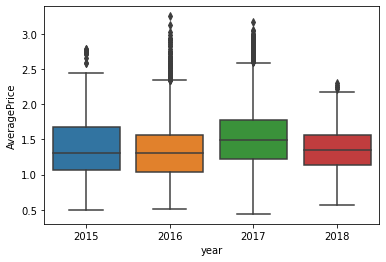

In [15]:
ax = sns.boxplot(x="year",y="AveragePrice",data=df)
print(df["year"].value_counts())

From the above boxplot we find that the price is highest in year 2017 followed by 2015,2016 and 2018

In [16]:
#Converting date (as it is a object) into a int type columns
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [17]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [18]:
#Converting type column (as it is a object type ) into float type column
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df["type"] = enc.fit_transform(df["type"].values.reshape(-1,1))
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,12.000000,31.000000


In [19]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,WestTexNewMexico,1,14


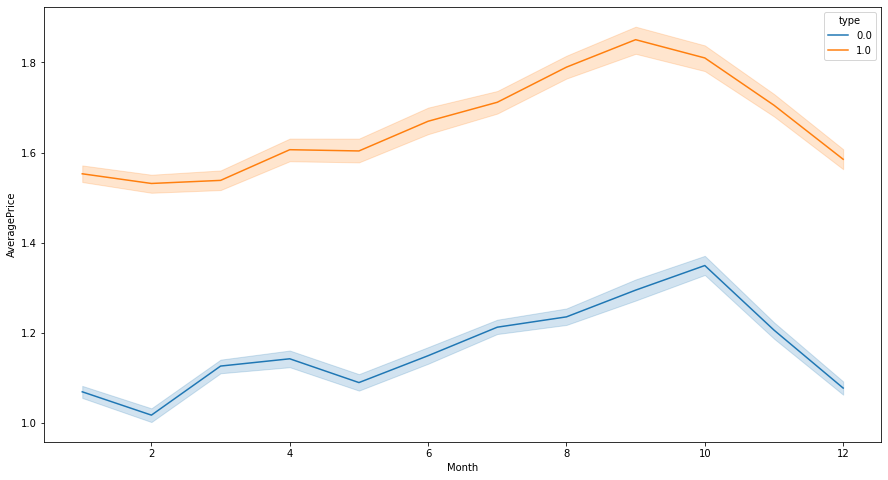

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Distributed of price over the months for 2 types (Conventional and Organic) of avocadoes.

Text(0.5, 1.0, 'Region wise average price of avocado')

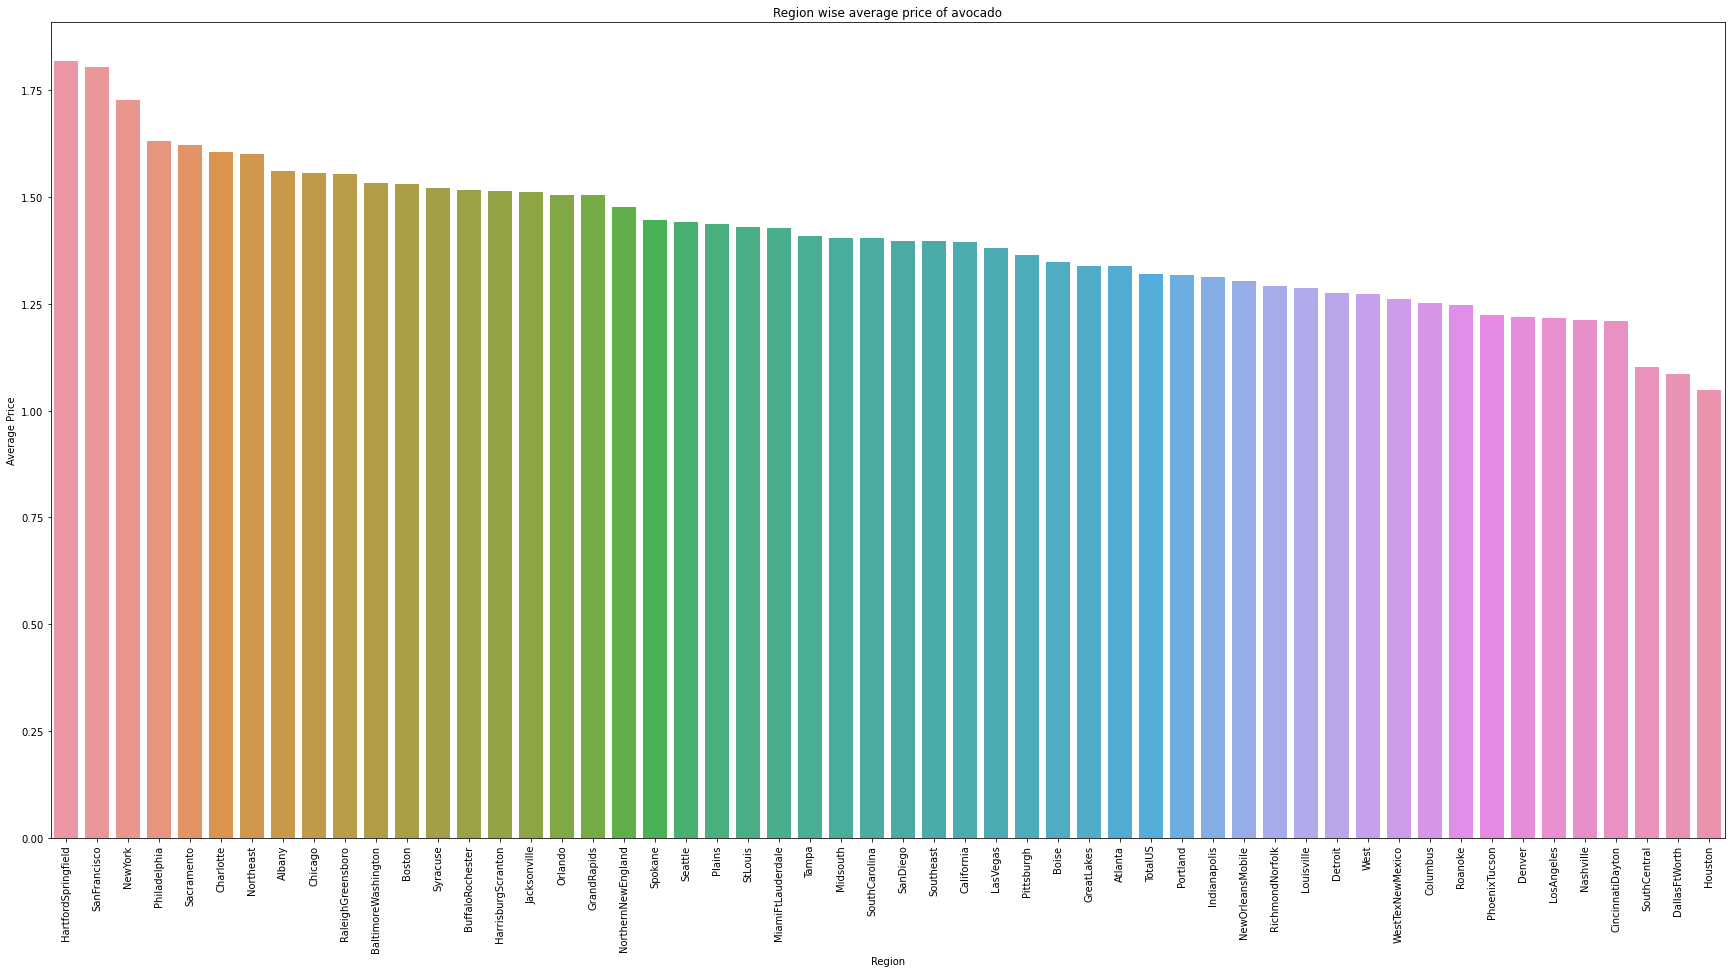

In [21]:
regionList=list(df.region.unique())
avgPrice=[]

for i in regionList:
    x=df[df.region==i]
    rgnAverage=sum(x.AveragePrice)/len(x)
    avgPrice.append(rgnAverage)

dfNew=pd.DataFrame({'regionList':regionList,'avgPrice':avgPrice})
new_index=dfNew.avgPrice.sort_values(ascending=False).index.values
sorted_data=dfNew.reindex(new_index)

plt.figure(figsize=(30,15))
ax=sns.barplot(x=sorted_data.regionList,y=sorted_data.avgPrice)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Region wise average price of avocado')

HartfordSpringfield is the region with highest price

# Correlation Matrix below

<AxesSubplot:>

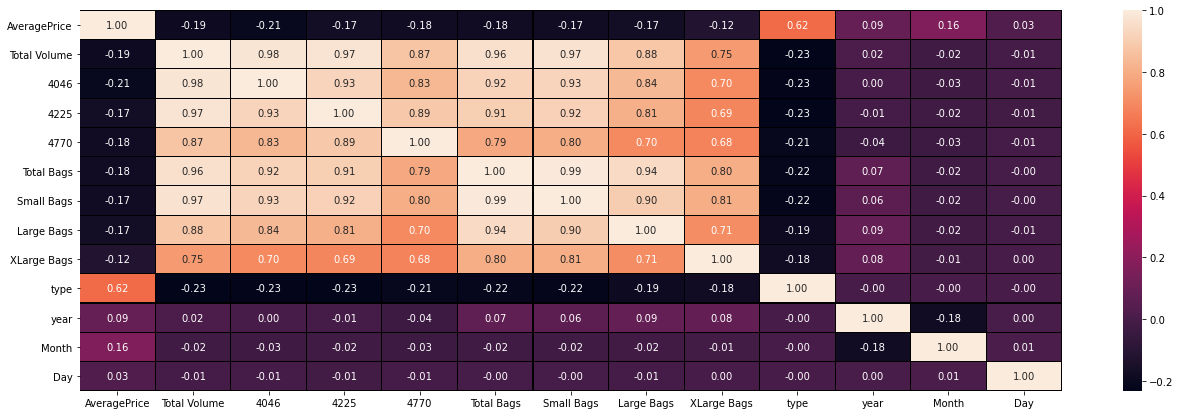

In [22]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

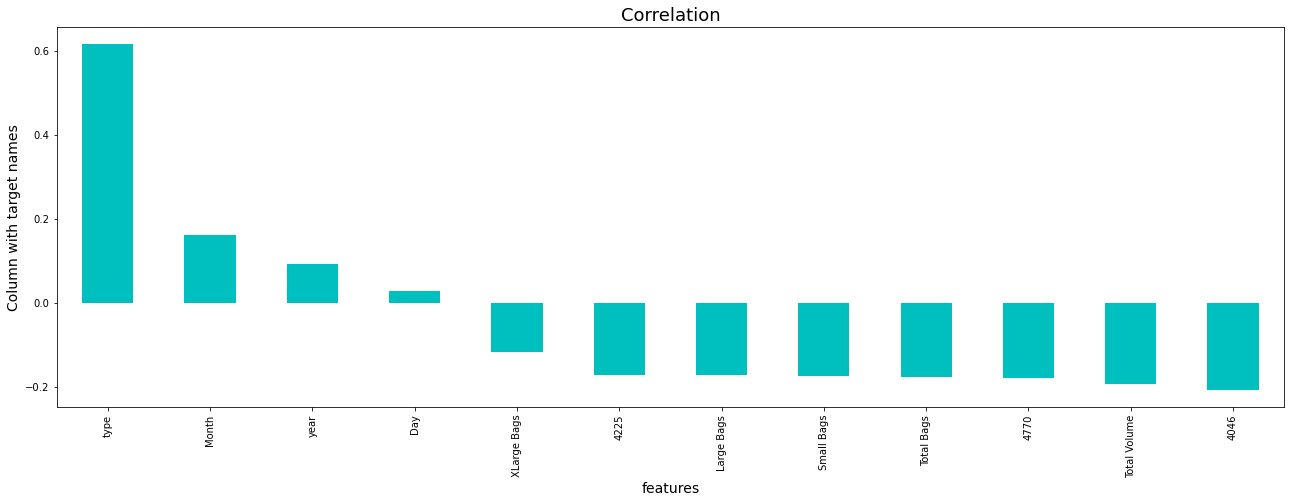

In [23]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

In [24]:
#Checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [25]:
#Removing skewness using log method
df['Total Volume']= np.log(df['Total Volume'])
df['4046']= np.log(df['4046'])
df['4225']= np.log(df['4225'])
df['4770']= np.log(df['4770'])
df['Total Bags']= np.log(df['Total Bags'])
df['Small Bags']= np.log(df['Small Bags'])
df['Large Bags']= np.log(df['Large Bags'])
df['XLarge Bags']= np.log(df['XLarge Bags'])


/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
year            AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Month           AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Day                   AxesSubplot(0.125,0.125;0.110714x0.222059)
dtype: object

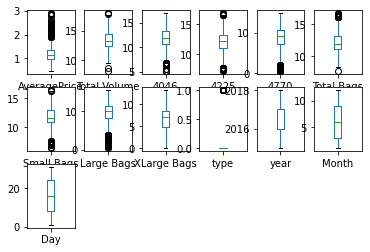

In [26]:
#Plotting boxplot to check outliers
df_new =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df_new.plot(kind='box',subplots=True,layout=(3,6))

Outliers are present in column Average Price, Toatal volume, 4046,4225,4770,Total Bags,Samall Bags, Large Bags, type

In [44]:
#removing outliers using Zscore
from scipy.stats import zscore
df_new = df_new.drop(['Date'], axis=1)
df_new = df_new.drop(['region'], axis=1)
z= np.abs(zscore(df_new))
np.where(z>3)

(array([  43,   44,   45,   46,   47,  923,  931,  939,  950,  962,  963,
         964,  972,  975, 1022, 1025, 1027, 1029, 1030, 1036, 1047, 1048,
        1168, 1169, 1370, 1384, 1387, 1390, 1391, 1392, 1394, 1397, 1422,
        1423, 1424, 1522, 1523, 2378, 2379, 2380, 2381, 2382, 2383, 2635,
        2638, 2639, 2653, 2678, 2679, 2680, 2681, 2682, 2684, 2685, 2686,
        2691, 2694, 2734, 2735, 2950, 2952, 2954, 2960, 2973, 3022, 3023,
        3094, 3325, 3327, 3330, 3481, 3482, 3483, 3484, 3485, 3763, 3764,
        3765, 3903, 4805, 4812, 4884, 4885, 4935, 5152, 5159, 5160, 5163,
        5227, 5280, 5281, 5282, 5283, 5284, 5285, 5288, 5289, 5290, 5301,
        5302, 5302, 5302, 5303, 5908, 5908, 5909, 5910, 5911, 5912, 5914,
        5915, 5915, 5915, 5916, 5917, 5944, 5945, 5946, 5946, 5947, 5948,
        5948, 5949, 5950, 5950, 5951, 5952, 5952, 5953, 5953, 5953, 5953,
        5954, 5954, 5954, 5954, 5954, 5955, 5955, 5955, 5955, 5956, 5956,
        5956, 5956, 5957, 5957, 5957, 

In [75]:
df_new.shape

(6060, 13)

In [45]:
df_new_z = df_new[(z<3).all(axis=1)]
df_new_z.shape

(5834, 13)

In [47]:
data_loss = ((6060-5834)/6060)*100
data_loss

3.72937293729373

Data loss is acceptable

# For predicting Price

In [49]:
#Dividing data into x and y i.e input and target
x=df_new_z.iloc[:,1:]# independent variables
y=df_new_z.iloc[:,1]#target


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Applying models to check accuracy score

In [55]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# SVR
Kernel =['linear','poly','rbf']
for i in Kernel:
    sv =SVR(kernel='linear')
    sv.fit(X_train,y_train)
    predsv= sv.predict(X_test)
    print("#####Accuracy score with train data for kernel", i, "is:#####\n",sv.score(X_train,y_train))

#####Accuracy score with linear is:#####
 0.8992504670173836
#####Accuracy score with poly is:#####
 0.8992504670173836
#####Accuracy score with rbf is:#####
 0.8992504670173836


Score is same in all kernels

In [56]:
# K neighbour
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
predkn= kn.predict(X_test)
print("#####Accuracy score is:#####\n",kn.score(X_train,y_train))

#####Accuracy score is:#####
 0.9750722803618909


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predmn=gbr.predict(X_test)
print("#####Accuracy score with is:#####\n",gbr.score(X_train,y_train))

#####Accuracy score with is:#####
 0.999941445179828


In [59]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
preddtr=dtr.predict(X_test)
print("#####Accuracy score with is:#####\n",dtr.score(X_train,y_train))

#####Accuracy score with is:#####
 1.0


Since we got the Accuracy score as 1 in DTR we need not to check any other model and finally we will save this model

In [63]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(dtr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)
conclusion =pd.DataFrame([loaded_model.predict(X_test)[:],preddtr[:]],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925
Predicted,13.630611,12.707689,15.439354,12.335496,11.890671,12.348293,13.665323,12.0999,15.517201,13.006394,...,12.136296,12.474158,17.238215,12.401909,15.239635,12.436846,15.360624,13.076607,15.646439,13.717251
Original,13.630611,12.707689,15.439354,12.335496,11.890671,12.348293,13.665323,12.0999,15.517201,13.006394,...,12.136296,12.474158,17.238215,12.401909,15.239635,12.436846,15.360624,13.076607,15.646439,13.717251


# Predicting region

In [76]:
import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv("avocado.csv")
df.columns#printing all the columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [77]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [78]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [79]:
#Checking unique values in target column
df['region'].nunique()

54

In [80]:
df['region']

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [82]:
#Converting the type column into int values from string values using ordinal encoder
df['type'].replace(['conventional', 'organic'],[0, 1], inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [83]:
#Converting the target column into int values from string values using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int64

In [84]:
#Removing unnamed column
df = df.iloc[:,1:]

0    9126
1    9123
Name: type, dtype: int64


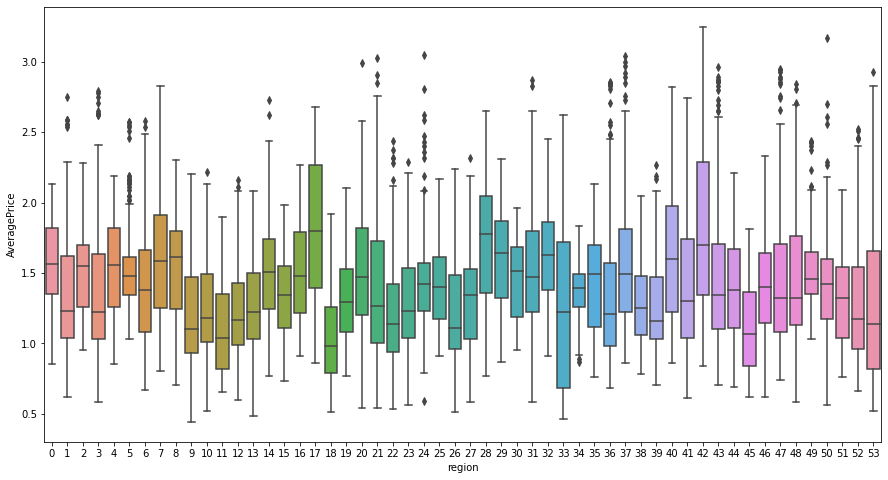

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region",y="AveragePrice",data=df)
print(df["type"].value_counts())

0    9126
1    9123
Name: type, dtype: int64


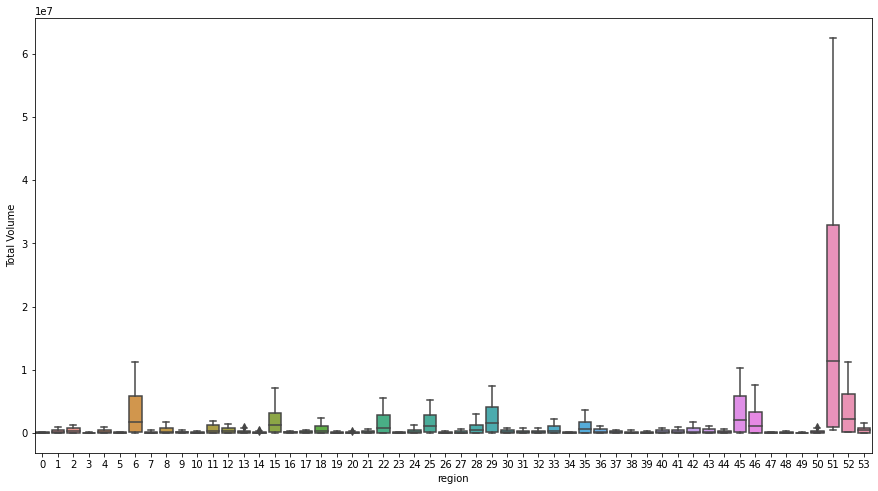

In [86]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region",y="Total Volume",data=df)
print(df["type"].value_counts())

0    9126
1    9123
Name: type, dtype: int64


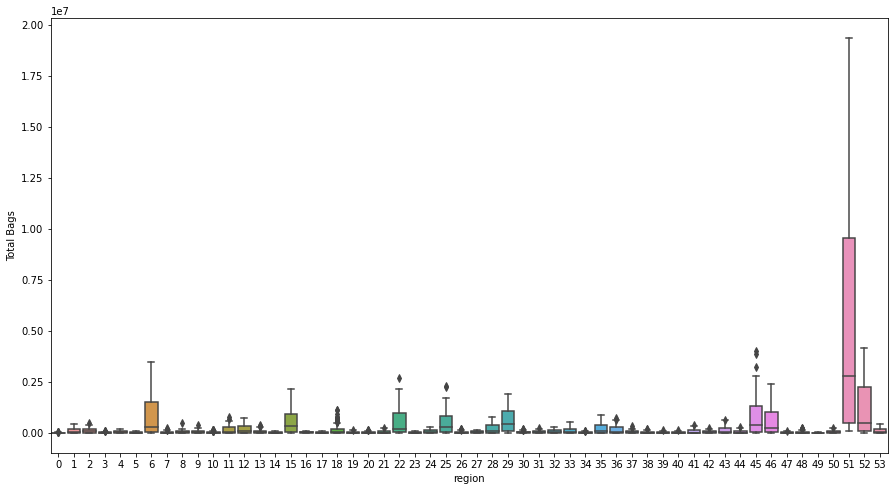

In [87]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region",y="Total Bags",data=df)
print(df["type"].value_counts())

0    9126
1    9123
Name: type, dtype: int64


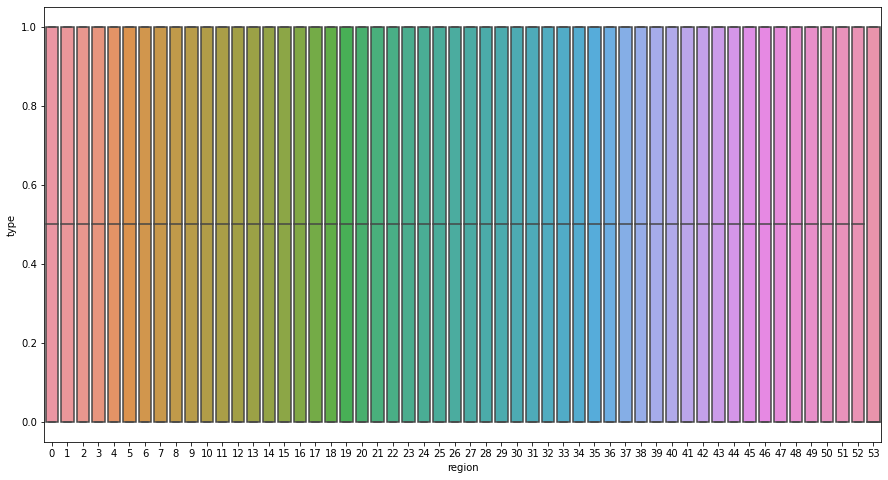

In [88]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region",y="type",data=df)
print(df["type"].value_counts())

0    9126
1    9123
Name: type, dtype: int64


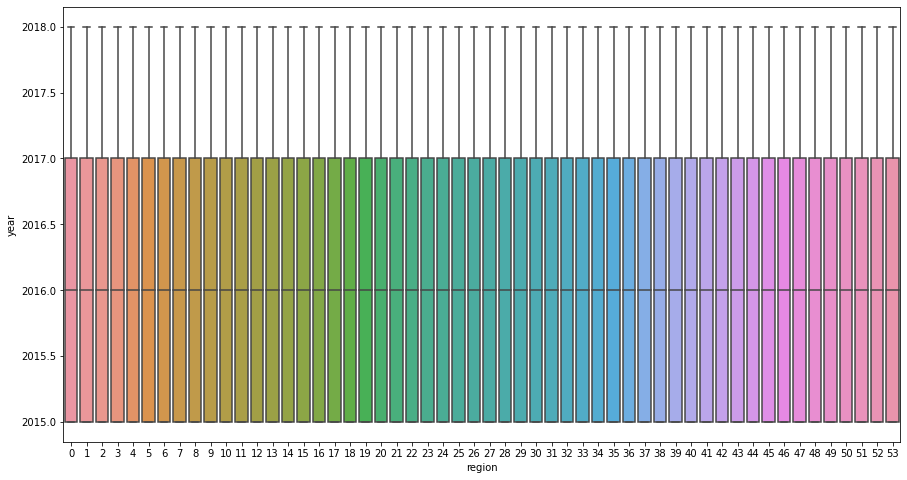

In [89]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region",y="year",data=df)
print(df["type"].value_counts())

Text(0.5, 1.0, 'Region wise average price of avocado')

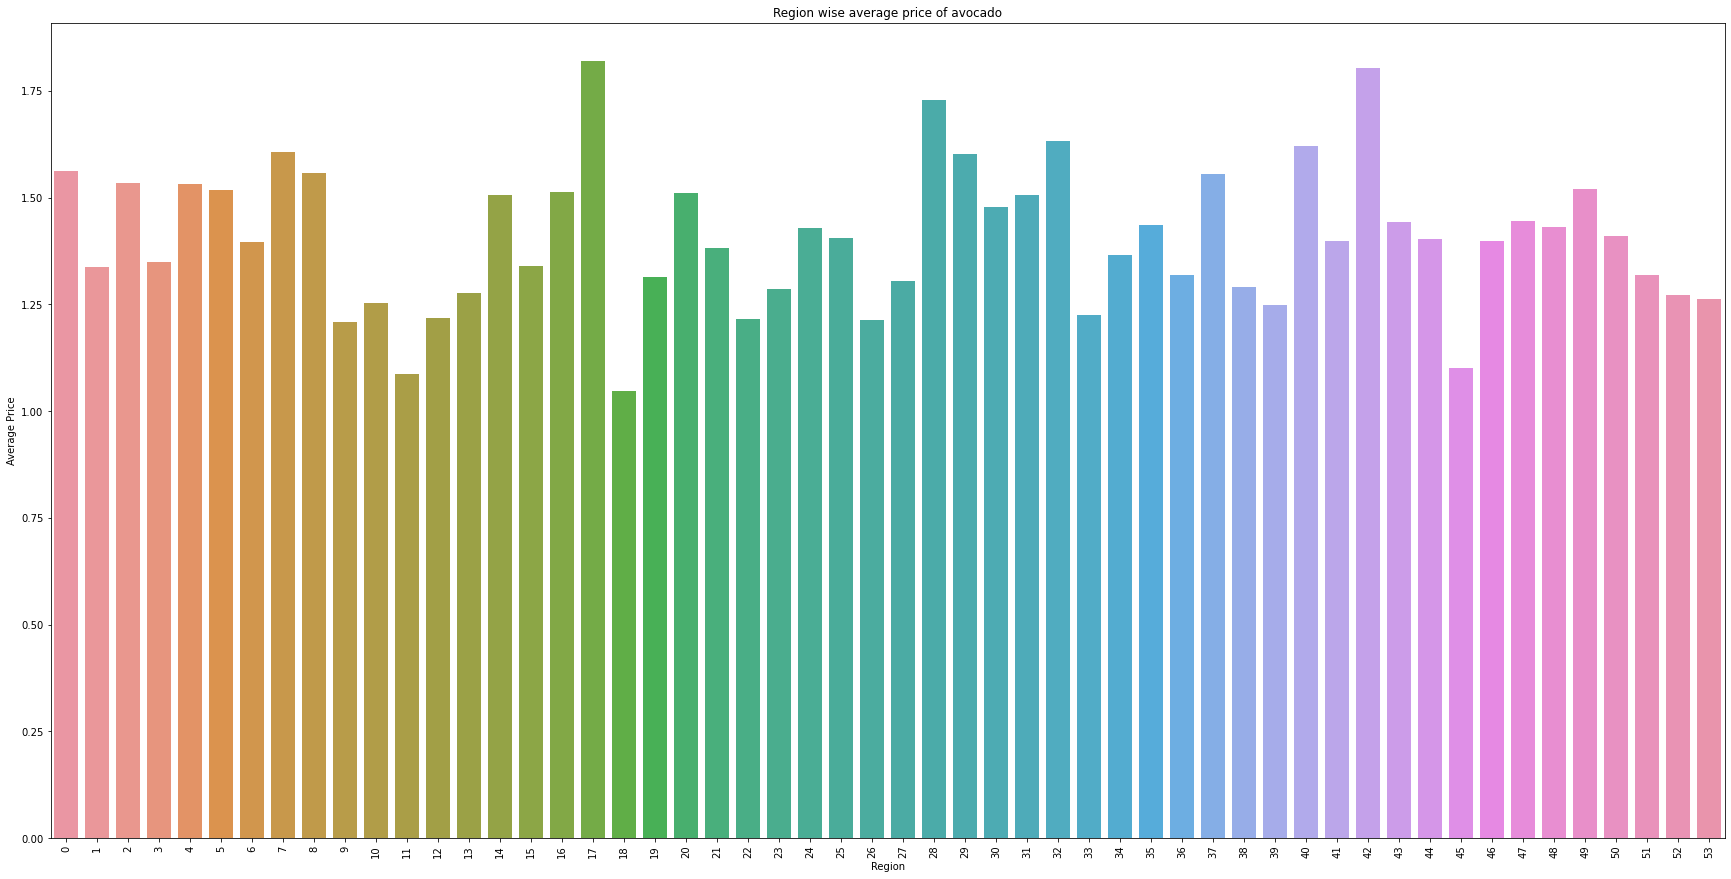

In [90]:
regionList=list(df.region.unique())
avgPrice=[]

for i in regionList:
    x=df[df.region==i]
    rgnAverage=sum(x.AveragePrice)/len(x)
    avgPrice.append(rgnAverage)

dfNew=pd.DataFrame({'regionList':regionList,'avgPrice':avgPrice})
new_index=dfNew.avgPrice.sort_values(ascending=False).index.values
sorted_data=dfNew.reindex(new_index)

plt.figure(figsize=(30,15))
ax=sns.barplot(x=sorted_data.regionList,y=sorted_data.avgPrice)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Region wise average price of avocado')

<AxesSubplot:>

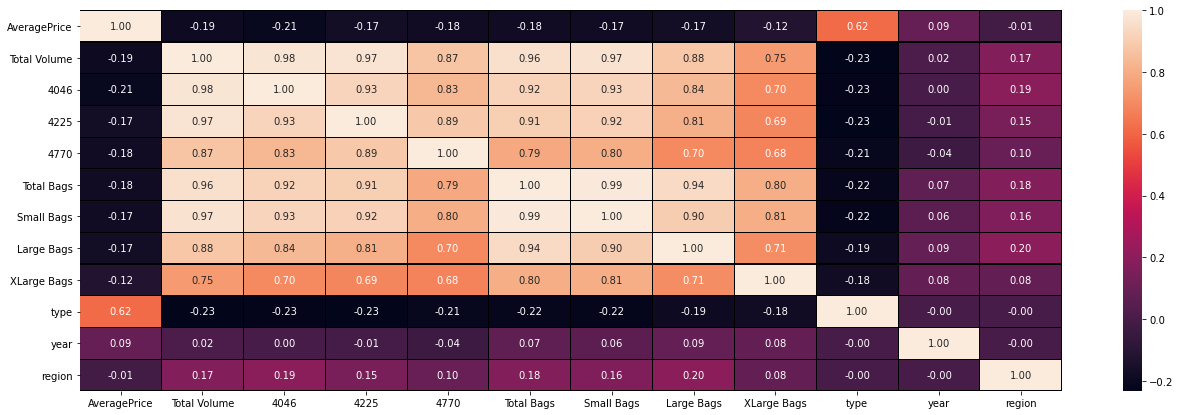

In [91]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

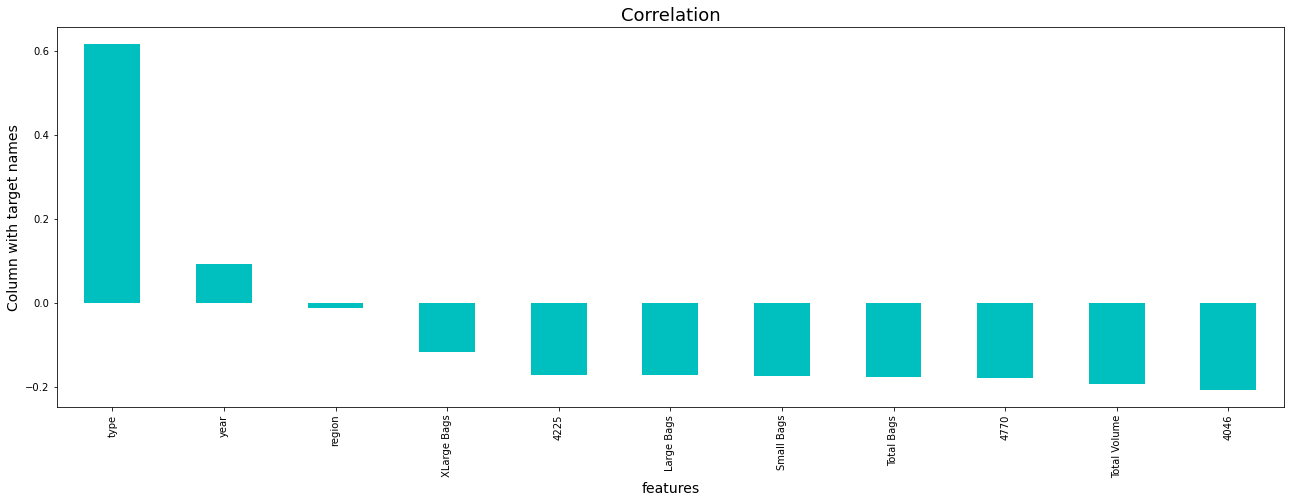

In [92]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

In [93]:
#Checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [94]:
#Removing skewness using log method
df['Total Volume']= np.log(df['Total Volume'])
df['4046']= np.log(df['4046'])
df['4225']= np.log(df['4225'])
df['4770']= np.log(df['4770'])
df['Total Bags']= np.log(df['Total Bags'])
df['Small Bags']= np.log(df['Small Bags'])
df['Large Bags']= np.log(df['Large Bags'])
df['XLarge Bags']= np.log(df['XLarge Bags'])

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
year            AxesSubplot(0.656429,0.391471;0.110714x0.222059)
region          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

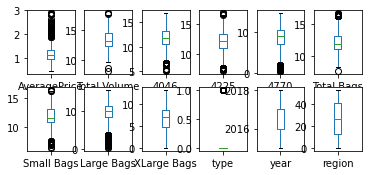

In [95]:
#Plotting boxplot to check outliers
df_new =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df_new.plot(kind='box',subplots=True,layout=(3,6))

Outliers are present in column Average Price, Toatal volume, 4046,4225,4770,Total Bags,Samall Bags, Large Bags, type

In [96]:
#removing outliers using Zscore
from scipy.stats import zscore
df_new = df_new.drop(['Date'], axis=1)
#df_new = df_new.drop(['region'], axis=1)
z= np.abs(zscore(df_new))
np.where(z>3)

(array([  43,   44,   45,   46,   47,  923,  931,  939,  950,  962,  963,
         964,  972,  975, 1022, 1025, 1027, 1029, 1030, 1036, 1047, 1048,
        1168, 1169, 1370, 1384, 1387, 1390, 1391, 1392, 1394, 1397, 1422,
        1423, 1424, 1522, 1523, 2378, 2379, 2380, 2381, 2382, 2383, 2635,
        2638, 2639, 2653, 2678, 2679, 2680, 2681, 2682, 2684, 2685, 2686,
        2691, 2694, 2734, 2735, 2950, 2952, 2954, 2960, 2973, 3022, 3023,
        3094, 3325, 3327, 3330, 3481, 3482, 3483, 3484, 3485, 3763, 3764,
        3765, 3903, 4805, 4812, 4884, 4885, 4935, 5152, 5159, 5160, 5163,
        5227, 5280, 5281, 5282, 5283, 5284, 5285, 5288, 5289, 5290, 5301,
        5302, 5302, 5302, 5303, 5908, 5908, 5909, 5910, 5911, 5912, 5914,
        5915, 5915, 5915, 5916, 5917, 5944, 5945, 5946, 5946, 5947, 5948,
        5948, 5949, 5950, 5950, 5951, 5952, 5952, 5953, 5953, 5953, 5953,
        5954, 5954, 5954, 5954, 5954, 5955, 5955, 5955, 5955, 5956, 5956,
        5956, 5956, 5957, 5957, 5957, 

In [97]:
df_new.shape

(6060, 12)

In [98]:
df_new_z = df_new[(z<3).all(axis=1)]
df_new_z.shape

(5834, 12)

In [99]:
data_loss = ((6060-5834)/6060)*100
data_loss

3.72937293729373

Data loss is acceptable

In [100]:
df_new_z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
24,1.05,11.728483,6.510630,11.458401,8.356470,10.103645,10.097823,4.686658,3.506458,0,2015,0
38,1.16,10.765578,6.868775,10.479473,4.540738,9.280700,9.197170,6.627525,4.646024,0,2015,0
54,0.96,12.942692,12.691372,10.342358,5.619676,11.027529,10.568841,10.026953,2.604909,0,2015,1
55,1.07,12.787273,12.553287,10.074952,5.203567,10.833485,10.519556,9.521836,0.996949,0,2015,1
56,0.99,12.716741,12.430370,10.271238,5.729548,10.892930,10.405224,9.939750,3.194993,0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9121,0.76,14.056132,13.183400,12.818412,9.478702,12.789807,11.758480,12.344904,6.830010,0,2018,53
9122,0.85,13.771649,13.079765,12.097870,8.897680,12.581539,11.873609,11.900745,5.788950,0,2018,53
9123,0.84,13.836208,13.132835,12.089041,9.155773,12.701590,11.686698,12.250716,5.075174,0,2018,53
9124,0.90,13.765222,13.047523,12.144867,9.326119,12.569518,11.739333,11.995599,5.331123,0,2018,53


In [102]:
#Dividing data into x and y i.e input and target
x=df_new_z.iloc[:,0:-1]# independent variables
y=df_new_z.iloc[:,-1]#target

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Selection

In [104]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_train, y_train)

0.2553735926305015

In [105]:
regr.score(X_test, y_test)

0.29075804776739356

In [106]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_train, y_train)

0.8283009211873081

In [107]:
knn.score(X_test, y_test)

0.9065420560747663

In [108]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
dtr.score(X_train, y_train)

1.0

In [109]:
dtr.score(X_test, y_test)

0.8411214953271028

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


gbr.score(X_train, y_train)

1.0

In [111]:
gbr.score(X_test, y_test)

0.8707165109034268

In [112]:
#Ridge
from sklearn.linear_model import Ridge
ridgeMod = Ridge(alpha=0.01, normalize=True)
ridgeMod.fit(X_train, y_train)
ridgeMod.fit(X_test, y_test)
ridge_model_pred = ridgeMod.predict(X_test)
ridgeMod.score(X_train, y_train)

0.21441641112784837

In [113]:
ridgeMod.score(X_test, y_test)


0.2164020072532794

Best model is Decision tree classifier as the score is highest

In [114]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(dtr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)
conclusion =pd.DataFrame([loaded_model.predict(X_test)[:],y_test_pred[:]],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925
Predicted,41,16,45,9,39,26,8,20,45,41,...,38,38,51,21,29,9,45,32,45,12
Original,36,16,45,9,39,26,8,20,22,41,...,38,38,51,7,29,9,45,32,45,36
